In [0]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
churn_master_df = pd.read_csv('https://raw.githubusercontent.com/plthiyagu/Personnel/master/Dataset/churn_data_st.csv')

In [0]:
churn_df= churn_master_df.copy()

In [4]:
churn_df.head()

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No
2,3668-QPYBK,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No
4,9237-HQITU,Female,0,2,2,Month-to-month,Yes,70.70,151.65,Yes


In [5]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   tenure            7043 non-null   int64  
 4   ServiceCount      7043 non-null   int64  
 5   Contract          7043 non-null   object 
 6   PaperlessBilling  7043 non-null   object 
 7   MonthlyCharges    7043 non-null   float64
 8   TotalCharges      7032 non-null   float64
 9   Churn             7043 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 550.4+ KB


In [6]:
print ("Rows     : " ,churn_df.shape[0])
print ("Columns  : " ,churn_df.shape[1])
print ("\nFeatures : \n" ,churn_df.columns.tolist())
print ("\nUnique values :  \n",churn_df.nunique())

Rows     :  7043
Columns  :  10

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'tenure', 'ServiceCount', 'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn']

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
tenure                73
ServiceCount           9
Contract               3
PaperlessBilling       2
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64


In [15]:
churn_df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

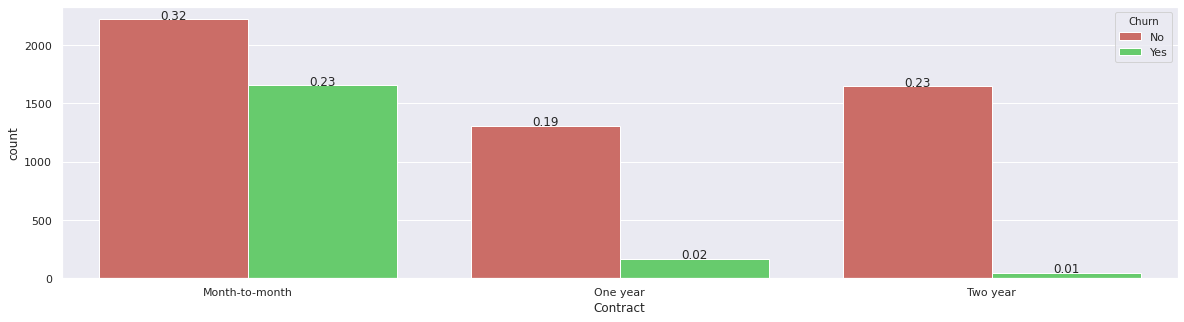

In [16]:
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="Contract", hue="Churn", data=churn_df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/churn_df.shape[0]),
            ha="center")

In [0]:
Contract_churn_ct=pd.crosstab(index=churn_df['Contract'],columns=churn_df['Churn'])

In [21]:
Contract_churn_ct

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


In [22]:
Contract_churn_ct.iloc[0].values

array([2220, 1655])

In [0]:
from scipy import stats
(chi2, p, dof,_) = stats.chi2_contingency([Contract_churn_ct.iloc[0].values,Contract_churn_ct.iloc[1].values])

In [24]:
print ("chi2     : " ,chi2)
print ("p-value  : " ,p)
print ("Degree for Freedom : " ,dof)

chi2     :  468.4084443130493
p-value  :  7.113840265103799e-104
Degree for Freedom :  1


In [0]:
import numpy as np

In [27]:
np.sqrt(chi2/(churn_df.shape[0]))

0.2578894130355515

In [29]:
churn_df['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

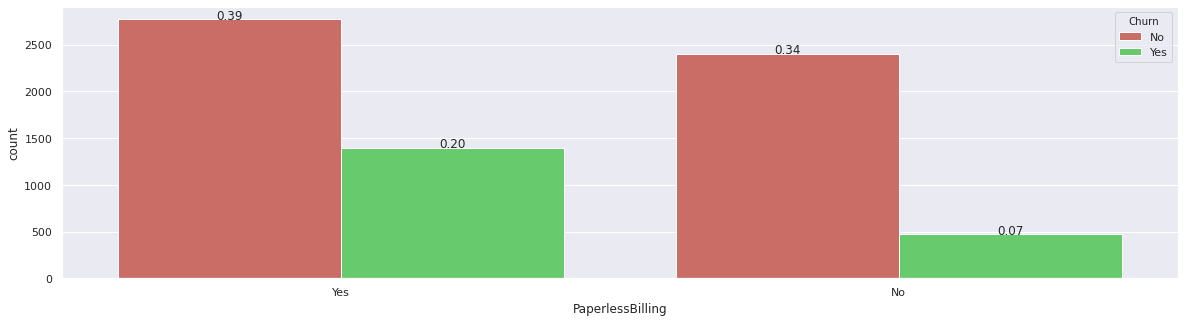

In [30]:
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="PaperlessBilling", hue="Churn", data=churn_df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/churn_df.shape[0]),
            ha="center")

In [0]:
pb_churn_ct=pd.crosstab(index=churn_df['PaperlessBilling'],columns=churn_df['Churn'])

In [32]:
pb_churn_ct

Churn,No,Yes
PaperlessBilling,,
No,2403,469
Yes,2771,1400


In [0]:
from scipy import stats
(chi2, p, dof,_) = stats.chi2_contingency([pb_churn_ct.iloc[0].values,pb_churn_ct.iloc[1].values])

In [34]:
print ("chi2     : " ,chi2)
print ("p-value  : " ,p)
print ("Degree for Freedom : " ,dof)

chi2     :  258.27764906707307
p-value  :  4.073354668665985e-58
Degree for Freedom :  1


In [35]:
np.sqrt(chi2/(churn_df.shape[0]))

0.19149814355338285

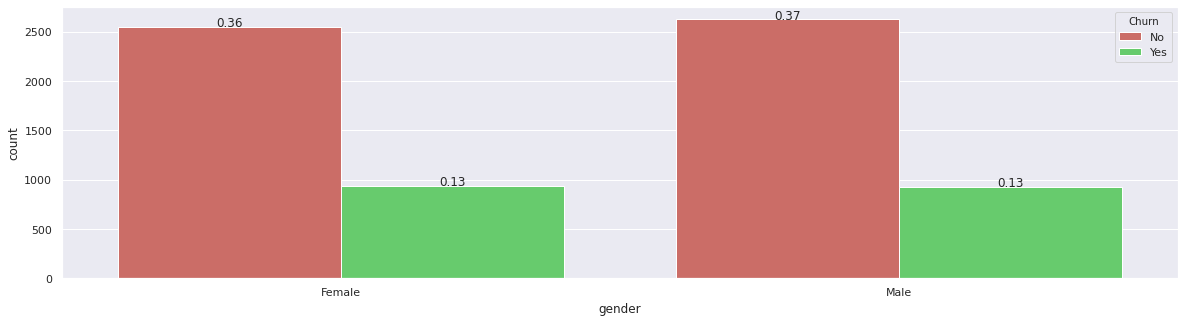

In [36]:
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="gender", hue="Churn", data=churn_df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/churn_df.shape[0]),
            ha="center")

In [0]:
gender_churn_ct=pd.crosstab(index=churn_df['gender'],columns=churn_df['Churn'])

In [38]:
gender_churn_ct

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


In [39]:
gender_churn_ct.iloc[0].values

array([2549,  939])

In [0]:
from scipy import stats
(chi2, p, dof,_) = stats.chi2_contingency([gender_churn_ct.iloc[0].values,gender_churn_ct.iloc[1].values])

In [41]:
print ("chi2     : " ,chi2)
print ("p-value  : " ,p)
print ("Degree for Freedom : " ,dof)

chi2     :  0.4840828822091383
p-value  :  0.48657873605618596
Degree for Freedom :  1


In [42]:
np.sqrt(chi2/(churn_df.shape[0]))

0.008290505631771371